# Changing the Consumer Data


In [265]:
# Importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing the data

In [266]:
#Importing the documents
df1=pd.read_excel('/content/VAl1Sep22-1Sep23.xlsx')
df1=df1.drop_duplicates()
df2=pd.read_csv('/content/VAl20_21.csv')
df2=df2.drop_duplicates()

In [267]:
df2

,Date;value;measurement
0,31-12-2020 01:00;5.6;KWH
1,31-12-2020 02:00;4.8;KWH
2,31-12-2020 03:00;5.6;KWH
3,31-12-2020 04:00;7.2;KWH
4,31-12-2020 05:00;4.8;KWH
...,...
8779,31-12-2021 20:00;10.4;KWH
8780,31-12-2021 21:00;10.4;KWH
8781,31-12-2021 22:00;10;KWH
8782,31-12-2021 23:00;8.8;KWH


In [268]:
#Changing the columns and rows of the df2
df2[['Date','values','measurement']]=df2['Date;value;measurement'].str.split(';',expand=True)
df2=df2.drop(columns='Date;value;measurement')
df2[['date','time']]=df2['Date'].str.split(' ',expand=True)
df2=df2.drop(columns='Date')
df2[['dates','month','year']]=df2['date'].str.split('-',expand=True)
df2=df2.drop(columns='date')
df2[['hour','minutes']]=df2['time'].str.split(':',expand=True)
df2=df2.drop(columns='time')
df2['minutes'].value_counts()
df2=df2.drop(columns='minutes')
df2=df2.rename(columns={'dates':'date'})
df2=df2.drop(columns='measurement')
df2['year'] = df2['year'].astype(int)
df2['month'] = df2['month'].astype(int)
df2['date'] = df2['date'].astype(int)
df2['hour'] = df2['hour'].astype(int)
df2

,values,date,month,year,hour
0,5.6,31,12,2020,1
1,4.8,31,12,2020,2
2,5.6,31,12,2020,3
3,7.2,31,12,2020,4
4,4.8,31,12,2020,5
...,...,...,...,...,...
8779,10.4,31,12,2021,20
8780,10.4,31,12,2021,21
8781,10,31,12,2021,22
8782,8.8,31,12,2021,23


In [269]:
df1

,dt,values
0,2022-09-01 00:00:00,59.4
1,2022-09-01 01:00:00,148.4
2,2022-09-01 02:00:00,176.4
3,2022-09-01 03:00:00,171.6
4,2022-09-01 04:00:00,177.4
...,...,...
8730,2023-08-31 19:00:00,169.4
8731,2023-08-31 20:00:00,171.2
8732,2023-08-31 21:00:00,168.6
8733,2023-08-31 22:00:00,153.8


In [270]:
#changing the columns and rows of df1
df1['date']=df1['dt'].dt.day
df1['month']=df1['dt'].dt.month
df1['year']=df1['dt'].dt.year
df1['hour']=df1['dt'].dt.hour
df1=df1.drop(columns='dt')
df1

,values,date,month,year,hour
0,59.4,1,9,2022,0
1,148.4,1,9,2022,1
2,176.4,1,9,2022,2
3,171.6,1,9,2022,3
4,177.4,1,9,2022,4
...,...,...,...,...,...
8730,169.4,31,8,2023,19
8731,171.2,31,8,2023,20
8732,168.6,31,8,2023,21
8733,153.8,31,8,2023,22


# Checking the years , making it campatible

In [271]:
df1['year'].value_counts()

2023    5831
2022    2904
Name: year, dtype: int64

In [272]:
df2['year'].value_counts()

2021    8760
2020      23
2022       1
Name: year, dtype: int64

In [273]:
df2.drop(df2.head(23).index,inplace=True)
df2.drop(df2.tail(1).index,inplace=True)
df2=df2.reset_index()
df_2021=df2
df_2021

,index,values,date,month,year,hour
0,23,5.6,1,1,2021,0
1,24,5.6,1,1,2021,1
2,25,5.6,1,1,2021,2
3,26,5.2,1,1,2021,3
4,27,6,1,1,2021,4
...,...,...,...,...,...,...
8755,8778,10.8,31,12,2021,19
8756,8779,10.4,31,12,2021,20
8757,8780,10.4,31,12,2021,21
8758,8781,10,31,12,2021,22


In [274]:
df1=df1.sort_values(by=['month','date','hour'])

In [275]:
df_2023=df1[:(8735-2904)]
df_2022=df1[(8735-2904):]
df_2023=df_2023.reset_index(drop=True)

In [276]:
df_2022

,values,date,month,year,hour
0,59.4,1,9,2022,0
1,148.4,1,9,2022,1
2,176.4,1,9,2022,2
3,171.6,1,9,2022,3
4,177.4,1,9,2022,4
...,...,...,...,...,...
2899,6.4,31,12,2022,19
2900,4.4,31,12,2022,20
2901,4.8,31,12,2022,21
2902,4.4,31,12,2022,22


In [277]:
df_2023

,values,date,month,year,hour
0,5.6,1,1,2023,0
1,3.2,1,1,2023,1
2,3.2,1,1,2023,2
3,5.2,1,1,2023,3
4,10.8,1,1,2023,4
...,...,...,...,...,...
5826,169.4,31,8,2023,19
5827,171.2,31,8,2023,20
5828,168.6,31,8,2023,21
5829,153.8,31,8,2023,22


# ExtraPoalting the Graphs of 2022 using 2021 and 2023

In [278]:
import pandas as pd
new_rows = []
# Iterate through rows of df1_2023 and df2 simultaneously
for i, (index,row1) in enumerate(df_2023.iterrows()):
    row2 = df_2021.iloc[i]
    new_row_data = {
        'date': row1['date'],'year': 2022,'month': row1['month'],'hour': row1['hour'],'values': (float(row1['values']) + float(row2['values'])) / 2
    }
    new_rows.append(new_row_data)
df_2022 = df_2022.append(new_rows, ignore_index=True)
df_2022['year'] = df_2022['year'].astype(int)
df_2022['month'] = df_2022['month'].astype(int)
df_2022['date'] = df_2022['date'].astype(int)
df_2022['hour'] = df_2022['hour'].astype(int)

<ipython-input-278-bf4cd5454a87>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2022 = df_2022.append(new_rows, ignore_index=True)


In [279]:
df_2022

,values,date,month,year,hour
0,59.4,1,9,2022,0
1,148.4,1,9,2022,1
2,176.4,1,9,2022,2
3,171.6,1,9,2022,3
4,177.4,1,9,2022,4
...,...,...,...,...,...
8730,89.7,31,8,2022,19
8731,90.0,31,8,2022,20
8732,88.7,31,8,2022,21
8733,79.9,31,8,2022,22


# Including the 3 remaining Days

In [280]:
df_2022['month'].value_counts()

12    744
1     744
5     744
7     744
8     744
3     743
9     720
10    720
11    720
4     720
6     720
2     672
Name: month, dtype: int64

In [281]:
df_2022['month'].value_counts()

12    744
1     744
5     744
7     744
8     744
3     743
9     720
10    720
11    720
4     720
6     720
2     672
Name: month, dtype: int64

In [282]:
value_counts_by_month_date = df_2022.groupby(['month', 'date']).size()
value_counts_by_month_date_df = value_counts_by_month_date.reset_index(name='counts')
value_counts_by_month_date_df

,month,date,counts
0,1,1,24
1,1,2,24
2,1,3,24
3,1,4,24
4,1,5,24
...,...,...,...
359,12,27,24
360,12,28,24
361,12,29,24
362,12,30,24


In [283]:
value_counts_by_month_date_df['counts'].value_counts()

24    363
23      1
Name: counts, dtype: int64

In [284]:
# Missing datas
october_31_data = df_2022[(df_2022['month'] == 10) & (df_2022['date'] == 31)]
october_31_data['date'] = 30
october_31_data['month'] = 10
march_26_data=df_2022[(df_2022['month']==3) & (df_2022['date']==25) & (df_2022['hour']==23)]
march_26_data['date'] = 26
#Appending the datas
df_2022 = df_2022.append(october_31_data, ignore_index=True)
df_2022 = df_2022.append(march_26_data, ignore_index=True)
df_2022.sort_values(by=['month','date','hour'], inplace=True)
df_2022=df_2022.reset_index(drop=True)
df_2022

<ipython-input-284-26997ed74b91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_31_data['date'] = 30
<ipython-input-284-26997ed74b91>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_31_data['month'] = 10
<ipython-input-284-26997ed74b91>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,values,date,month,year,hour
0,5.6,1,1,2022,0
1,4.4,1,1,2022,1
2,4.4,1,1,2022,2
3,5.2,1,1,2022,3
4,8.4,1,1,2022,4
...,...,...,...,...,...
8755,6.4,31,12,2022,19
8756,4.4,31,12,2022,20
8757,4.8,31,12,2022,21
8758,4.4,31,12,2022,22


# Extrapolating the graph of 2023 using the 2022 and 2021

In [285]:
rows_data=[]
for i in range (5832,8760):
  new_row_data={'date': df_2022.iloc[i]['date'],'year': 2023,'month': df_2022.iloc[i]['month'], 'hour':df_2022.iloc[i]['hour'], 'values': (float(2*(df_2022.iloc[i]['values']))-float(df_2021.iloc[i]['values']))}
  rows_data.append(new_row_data)
df_2023=df_2023.append(rows_data,ignore_index=True);
df_2023.sort_values(by=['month','date','hour'], inplace=True)
df_2023=df_2023.reset_index(drop=True)

<ipython-input-285-700ca1b0f835>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2023=df_2023.append(rows_data,ignore_index=True);


# Missing the days of the year 2023

In [286]:
df_2023

,values,date,month,year,hour
0,5.6,1.0,1.0,2023,0.0
1,3.2,1.0,1.0,2023,1.0
2,3.2,1.0,1.0,2023,2.0
3,5.2,1.0,1.0,2023,3.0
4,10.8,1.0,1.0,2023,4.0
...,...,...,...,...,...
8754,2.0,31.0,12.0,2023,19.0
8755,-1.6,31.0,12.0,2023,20.0
8756,-0.8,31.0,12.0,2023,21.0
8757,-1.2,31.0,12.0,2023,22.0


In [287]:
march_26_data=df_2022[(df_2022['month']==3) & (df_2022['date']==25) & (df_2022['hour']==23)]
march_26_data['date'] = 26
march_26_data['year']=23
df_2023 = df_2023.append(march_26_data, ignore_index=True)
df_2023.sort_values(by=['month','date','hour'], inplace=True)
df_2023=df_2023.reset_index(drop=True)
df_2023

<ipython-input-287-5aee402b91a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_26_data['date'] = 26
<ipython-input-287-5aee402b91a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_26_data['year']=23
<ipython-input-287-5aee402b91a5>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2023 = df_2023.append(march_26_data, ignore_index=True)


,values,date,month,year,hour
0,5.6,1.0,1.0,2023,0.0
1,3.2,1.0,1.0,2023,1.0
2,3.2,1.0,1.0,2023,2.0
3,5.2,1.0,1.0,2023,3.0
4,10.8,1.0,1.0,2023,4.0
...,...,...,...,...,...
8755,2.0,31.0,12.0,2023,19.0
8756,-1.6,31.0,12.0,2023,20.0
8757,-0.8,31.0,12.0,2023,21.0
8758,-1.2,31.0,12.0,2023,22.0


#Extrapolating the 2020,2019,2018 using 2021,2022,2023

In [288]:
import pandas as pd

# Create empty DataFrames for years 2020, 2019, and 2018
df_2020 = pd.DataFrame()
df_2019 = pd.DataFrame()
df_2018 = pd.DataFrame()

# Loop through the range of indices
for i in range(0, 8760):
    # Calculate values for the respective years
    values_2020 = ((2 * float(df_2021.iloc[i]['values'])) - (float(df_2022.iloc[i]['values'])))
    values_2019 = ((2 * values_2020) - (float(df_2021.iloc[i]['values'])))
    values_2018 = ((3 * values_2020) - (2 * float(df_2021.iloc[i]['values'])))

    # Create new rows for each year and append them to the respective DataFrames
    new_row_2020 = {
        'values': values_2020,
        'date': df_2021.iloc[i]['date'],
        'month': df_2021.iloc[i]['month'],
        'year': 2020,
        'hour': df_2021.iloc[i]['hour']
    }
    new_row_2019 = {
        'values': values_2019,
        'date': df_2021.iloc[i]['date'],
        'month': df_2021.iloc[i]['month'],
        'year': 2019,
        'hour': df_2021.iloc[i]['hour']
    }
    new_row_2018 = {
        'values': values_2018,
        'date': df_2021.iloc[i]['date'],
        'month': df_2021.iloc[i]['month'],
        'year': 2018,
        'hour': df_2021.iloc[i]['hour']
    }


    # Append new rows to the respective DataFrames
    df_2020 = pd.concat([df_2020, pd.DataFrame([new_row_2020])], ignore_index=True)
    df_2019 = pd.concat([df_2019, pd.DataFrame([new_row_2019])], ignore_index=True)
    df_2018 = pd.concat([df_2018, pd.DataFrame([new_row_2018])], ignore_index=True)

# Output the DataFrames for the respective years
print("DataFrame for 2023:")
print(df_2023)
print("DataFrame for 2022:")
print(df_2022)
print("DataFrame for 2021:")
df_2021=df_2021.drop(columns='index')
print(df_2021)
print("DataFrame for 2020:")
print(df_2020)
print("\nDataFrame for 2019:")
print(df_2019)
print("\nDataFrame for 2018:")
print(df_2018)


DataFrame for 2023:
      values  date  month  year  hour
0        5.6   1.0    1.0  2023   0.0
1        3.2   1.0    1.0  2023   1.0
2        3.2   1.0    1.0  2023   2.0
3        5.2   1.0    1.0  2023   3.0
4       10.8   1.0    1.0  2023   4.0
...      ...   ...    ...   ...   ...
8755     2.0  31.0   12.0  2023  19.0
8756    -1.6  31.0   12.0  2023  20.0
8757    -0.8  31.0   12.0  2023  21.0
8758    -1.2  31.0   12.0  2023  22.0
8759     3.6  31.0   12.0  2023  23.0

[8760 rows x 5 columns]
DataFrame for 2022:
      values  date  month  year  hour
0        5.6     1      1  2022     0
1        4.4     1      1  2022     1
2        4.4     1      1  2022     2
3        5.2     1      1  2022     3
4        8.4     1      1  2022     4
...      ...   ...    ...   ...   ...
8755     6.4    31     12  2022    19
8756     4.4    31     12  2022    20
8757     4.8    31     12  2022    21
8758     4.4    31     12  2022    22
8759     6.2    31     12  2022    23

[8760 rows x 5 columns

# Table for the VA (6* 8760)

In [289]:
import pandas as pd
mixed_df=pd.DataFrame()
mixed_df['date']=df_2023['date']
mixed_df['month']=df_2023['month']
mixed_df['hour']=df_2023['hour']
mixed_df['values_2023']=df_2023['values'].astype(float).round(2)
mixed_df['values_2022']=df_2022['values'].astype(float).round(2)
mixed_df['values_2021']=df_2021['values'].astype(float).round(2)
mixed_df['values_2020']=df_2020['values'].astype(float).round(2)
mixed_df['values_2019']=df_2019['values'].astype(float).round(2)
mixed_df['values_2018']=df_2018['values'].astype(float).round(2)
mixed_df

,date,month,hour,values_2023,values_2022,values_2021,values_2020,values_2019,values_2018
0,1.0,1.0,0.0,5.6,5.6,5.6,5.6,5.6,5.6
1,1.0,1.0,1.0,3.2,4.4,5.6,6.8,8.0,9.2
2,1.0,1.0,2.0,3.2,4.4,5.6,6.8,8.0,9.2
3,1.0,1.0,3.0,5.2,5.2,5.2,5.2,5.2,5.2
4,1.0,1.0,4.0,10.8,8.4,6.0,3.6,1.2,-1.2
...,...,...,...,...,...,...,...,...,...
8755,31.0,12.0,19.0,2.0,6.4,10.8,15.2,19.6,24.0
8756,31.0,12.0,20.0,-1.6,4.4,10.4,16.4,22.4,28.4
8757,31.0,12.0,21.0,-0.8,4.8,10.4,16.0,21.6,27.2
8758,31.0,12.0,22.0,-1.2,4.4,10.0,15.6,21.2,26.8


#Random Graph Generator

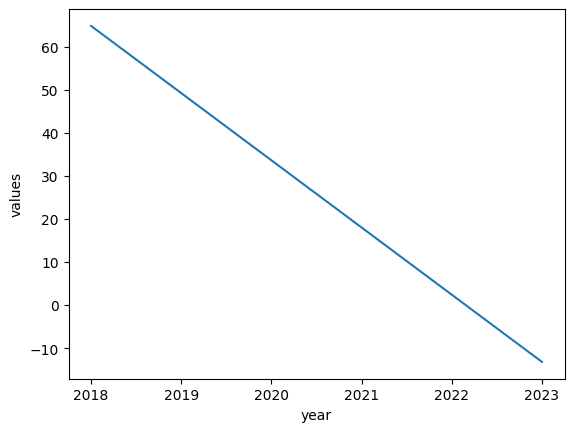

In [290]:
import matplotlib.pyplot as plt
import random
i=random.randint(0, 8759)
y_values=[mixed_df['values_2018'].iloc[i],mixed_df['values_2019'].iloc[i],mixed_df['values_2020'].iloc[i],mixed_df['values_2021'].iloc[i],mixed_df['values_2022'].iloc[i],mixed_df['values_2023'].iloc[i]]
x_values=[2018,2019,2020,2021,2022,2023]
plt.plot(x_values,y_values)
plt.xlabel('year')
plt.ylabel('values')
plt.show()

# Importing the Producers Data(DK1)

In [291]:
# Changes so that i can run easliy on the second set
import pandas as pd
DK1_2018=pd.read_excel("/content/ElectricityBalanceNonvDK1_1_2018_30_12_2018.xlsx")
DK1_2019=pd.read_excel("/content/ElectricityBalanceNonv DK1_1_1_2019_30_12_2019.xlsx")
DK1_2020=pd.read_excel("/content/ElectricityBalanceNonv DK1_1_1_20_30_12_20.xlsx")
DK1_2021=pd.read_excel('/content/ElectricityBalanceNonv 1_1_21_30_12_21.xlsx')
DK1_2022=pd.read_excel("/content/ElectricityBalanceNonv DK1_1_1_22_30_12_22.xlsx")
DK1_2023=pd.read_excel("/content/ElectricityBalanceNonv DK1_1_1_23_30_12_23.xlsx")

# Changing the Datas(DK1)

In [292]:
def processed_dfs(start_year,end_year,df):
  start_date=pd.to_datetime(f'{start_year}-01-01')
  end_date=pd.to_datetime(f'{end_year}-01-01')
  complete_data_range=pd.date_range(start=start_date,end=end_date, freq='H')
  complete_df=pd.DataFrame({'HourUTC':complete_data_range})
  complete_df=complete_df.drop(complete_df.tail(1).index)
  df=pd.merge(complete_df,df,on='HourUTC',how='left')
  df.fillna(0,inplace=True)
  df['HourUTC'] = df['HourUTC'].astype(str)
  df[['dates', 'time']] = df['HourUTC'].str.split(' ', expand=True)
  df[['year','month','date']]=df['dates'].str.split('-',expand=True)
  df[['hour','minutes','seconds']]=df['time'].str.split(':',expand=True)
  df=df.drop(columns=['seconds','minutes','time','dates','HourUTC','PriceArea','HourDK'])
  return df

In [293]:
DK1_2018=processed_dfs(2018,2019,DK1_2018)
DK1_2019=processed_dfs(2019,2020,DK1_2019)
DK1_2020=processed_dfs(2020,2021,DK1_2020)
DK1_2021=processed_dfs(2021,2022,DK1_2021)
DK1_2022=processed_dfs(2022,2023,DK1_2022)
DK1_2023=processed_dfs(2023,2024,DK1_2023)
DK1_2020 = DK1_2020[(DK1_2020['month'] != '02') | (DK1_2020['date'] != '29')]
DK1_2020=DK1_2020.reset_index(drop=True)
print("DK1_2018")
print(DK1_2018)
print("DK1_2019")
print(DK1_2019)
print("DK1_2020")
print(DK1_2020)
print("DK1_2021")
print(DK1_2021)
print("DK1_2022")
print(DK1_2022)
print("DK1_2023")
print(DK1_2023)

DK1_2018
        TotalLoad  year month date hour
0     1741.920044  2018    01   01   00
1     1657.520020  2018    01   01   01
2     1594.260010  2018    01   01   02
3     1535.880005  2018    01   01   03
4     1505.069946  2018    01   01   04
...           ...   ...   ...  ...  ...
8755     0.000000  2018    12   31   19
8756     0.000000  2018    12   31   20
8757     0.000000  2018    12   31   21
8758     0.000000  2018    12   31   22
8759     0.000000  2018    12   31   23

[8760 rows x 5 columns]
DK1_2019
        TotalLoad  year month date hour
0     1837.709961  2019    01   01   00
1     1778.859985  2019    01   01   01
2     1726.380005  2019    01   01   02
3     1709.619995  2019    01   01   03
4     1716.390015  2019    01   01   04
...           ...   ...   ...  ...  ...
8755     0.000000  2019    12   31   19
8756     0.000000  2019    12   31   20
8757     0.000000  2019    12   31   21
8758     0.000000  2019    12   31   22
8759     0.000000  2019    12   31   

# Generating the mixed df of the producers(DK1)

In [294]:
producer_mixed_df=pd.DataFrame()
producer_mixed_df['date']=DK1_2018['date']
producer_mixed_df['month']=DK1_2018['month']
producer_mixed_df['hour']=DK1_2018['hour']
producer_mixed_df['2018_values']=DK1_2018['TotalLoad'].astype(float).round(2)
producer_mixed_df['2019_values']=DK1_2019['TotalLoad'].astype(float).round(2)
producer_mixed_df['2020_values']=DK1_2020['TotalLoad'].astype(float).round(2)
producer_mixed_df['2021_values']=DK1_2021['TotalLoad'].astype(float).round(2)
producer_mixed_df['2022_values']=DK1_2022['TotalLoad'].astype(float).round(2)
producer_mixed_df['2023_values']=DK1_2023['TotalLoad'].astype(float).round(2)
producer_mixed_df

,date,month,hour,2018_values,2019_values,2020_values,2021_values,2022_values,2023_values
0,01,01,00,1741.92,1837.71,1892.60,2042.82,1339.80,2122.85
1,01,01,01,1657.52,1778.86,1830.97,1966.48,1283.86,2127.72
2,01,01,02,1594.26,1726.38,1782.09,1915.50,1243.84,2026.24
3,01,01,03,1535.88,1709.62,1745.69,1892.50,1229.96,1985.67
4,01,01,04,1505.07,1716.39,1781.79,1903.26,1200.01,1974.77
...,...,...,...,...,...,...,...,...,...
8755,31,12,19,0.00,0.00,0.00,0.00,0.00,0.00
8756,31,12,20,0.00,0.00,0.00,0.00,0.00,0.00
8757,31,12,21,0.00,0.00,0.00,0.00,0.00,0.00
8758,31,12,22,0.00,0.00,0.00,0.00,0.00,0.00


# Importing the Producers Datas(DK2)

In [295]:
DK2_2018=pd.read_excel("/content/ElectricityBalanceNonv DK2_1_1_201830_12_2018.xlsx")
DK2_2019=pd.read_excel("/content/ElectricityBalanceNonv DK2_1_1_2019_30_12_2019.xlsx")
DK2_2020=pd.read_excel("/content/ElectricityBalanceNonv Dk2_1_1_20_30_12_20.xlsx")
DK2_2021=pd.read_excel('/content/ElectricityBalanceNonv _DK2_1_1_21_30_12_21.xlsx')
DK2_2022=pd.read_excel("/content/ElectricityBalanceNonv DK1_1_1_22_30_12_22.xlsx")
DK2_2023=pd.read_excel("/content/ElectricityBalanceNonvDk2_1_1_23_30_12_23.xlsx")

# Changing the datas of Producers(DK2)

In [296]:
def processed_dfs(start_year,end_year,df):
  start_date=pd.to_datetime(f'{start_year}-01-01')
  end_date=pd.to_datetime(f'{end_year}-01-01')
  complete_data_range=pd.date_range(start=start_date,end=end_date, freq='H')
  complete_df=pd.DataFrame({'HourUTC':complete_data_range})
  complete_df=complete_df.drop(complete_df.tail(1).index)
  df=pd.merge(complete_df,df,on='HourUTC',how='left')
  df.fillna(0,inplace=True)
  df['HourUTC'] = df['HourUTC'].astype(str)
  df[['dates', 'time']] = df['HourUTC'].str.split(' ', expand=True)
  df[['year','month','date']]=df['dates'].str.split('-',expand=True)
  df[['hour','minutes','seconds']]=df['time'].str.split(':',expand=True)
  df=df.drop(columns=['seconds','minutes','time','dates','HourUTC','PriceArea','HourDK'])
  return df

In [297]:
DK2_2018=processed_dfs(2018,2019,DK2_2018)
DK2_2019=processed_dfs(2019,2020,DK2_2019)
DK2_2020=processed_dfs(2020,2021,DK2_2020)
DK2_2021=processed_dfs(2021,2022,DK2_2021)
DK2_2022=processed_dfs(2022,2023,DK2_2022)
DK2_2023=processed_dfs(2023,2024,DK2_2023)
DK2_2020 = DK2_2020[(DK2_2020['month'] != '02') | (DK2_2020['date'] != '29')]
DK2_2020=DK2_2020.reset_index(drop=True)
print("DK2_2018")
print(DK2_2018)
print("DK2_2019")
print(DK2_2019)
print("DK2_2020")
print(DK2_2020)
print("DK2_2021")
print(DK2_2021)
print("DK2_2022")
print(DK2_2022)
print("DK2_2023")
print(DK2_2023)

DK2_2018
        TotalLoad  year month date hour
0     1566.119995  2018    01   01   00
1     1460.449951  2018    01   01   01
2     1423.790039  2018    01   01   02
3     1380.469971  2018    01   01   03
4     1297.329956  2018    01   01   04
...           ...   ...   ...  ...  ...
8755     0.000000  2018    12   31   19
8756     0.000000  2018    12   31   20
8757     0.000000  2018    12   31   21
8758     0.000000  2018    12   31   22
8759     0.000000  2018    12   31   23

[8760 rows x 5 columns]
DK2_2019
        TotalLoad  year month date hour
0     1348.329956  2019    01   01   00
1     1291.209961  2019    01   01   01
2     1239.810059  2019    01   01   02
3     1223.859985  2019    01   01   03
4     1224.250000  2019    01   01   04
...           ...   ...   ...  ...  ...
8755     0.000000  2019    12   31   19
8756     0.000000  2019    12   31   20
8757     0.000000  2019    12   31   21
8758     0.000000  2019    12   31   22
8759     0.000000  2019    12   31   

# Mixed df of the Producers(DK2)

In [298]:
producer_mixed_df2=pd.DataFrame()
producer_mixed_df2['date']=DK2_2018['date']
producer_mixed_df2['month']=DK2_2018['month']
producer_mixed_df2['hour']=DK2_2018['hour']
producer_mixed_df2['2018_values']=DK2_2018['TotalLoad'].astype(float).round(2)
producer_mixed_df2['2019_values']=DK2_2019['TotalLoad'].astype(float).round(2)
producer_mixed_df2['2020_values']=DK2_2020['TotalLoad'].astype(float).round(2)
producer_mixed_df2['2021_values']=DK2_2021['TotalLoad'].astype(float).round(2)
producer_mixed_df2['2022_values']=DK2_2022['TotalLoad'].astype(float).round(2)
producer_mixed_df2['2023_values']=DK2_2023['TotalLoad'].astype(float).round(2)
producer_mixed_df2

,date,month,hour,2018_values,2019_values,2020_values,2021_values,2022_values,2023_values
0,01,01,00,1566.12,1348.33,1337.38,1363.04,1339.80,1266.10
1,01,01,01,1460.45,1291.21,1293.37,1309.83,1283.86,1214.75
2,01,01,02,1423.79,1239.81,1241.41,1260.21,1243.84,1166.02
3,01,01,03,1380.47,1223.86,1197.14,1231.28,1229.96,1121.30
4,01,01,04,1297.33,1224.25,1183.64,1234.17,1200.01,1098.68
...,...,...,...,...,...,...,...,...,...
8755,31,12,19,0.00,0.00,0.00,0.00,0.00,0.00
8756,31,12,20,0.00,0.00,0.00,0.00,0.00,0.00
8757,31,12,21,0.00,0.00,0.00,0.00,0.00,0.00
8758,31,12,22,0.00,0.00,0.00,0.00,0.00,0.00


# Calculating the Covariance of the DK1

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats import pearsonr

In [300]:
from scipy.stats import pearsonr

covariance_df = pd.DataFrame()
covariance_df['date'] = df_2018['date']
covariance_df['month'] = df_2018['month']
covariance_df['hour'] = df_2018['hour']
mixed_df.drop(columns=['month', 'date', 'hour'], inplace=True)
producer_mixed_df.drop(columns=['month', 'date', 'hour'], inplace=True)
producer_mixed_df2.drop(columns=['month', 'date', 'hour'], inplace=True)
for i in range(0, 8760):
    row1 = mixed_df.iloc[i].astype(float)
    row2 = producer_mixed_df.iloc[i].astype(float)
    row3 = producer_mixed_df2.iloc[i].astype(float)
    covariance_df.loc[i, 'covariance_value_with_DK1'] = pearsonr(row1, row2)[0]
    covariance_df.loc[i, 'covariance_value_with_DK2'] = pearsonr(row1, row3)[0]
covariance_df.reset_index(drop=True, inplace=True)
covariance_df


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,date,month,hour,covariance_value_with_DK1,covariance_value_with_DK2
0,1,1,0,NaN,NaN
1,1,1,1,0.184874,-0.811804
2,1,1,2,0.164347,-0.785533
3,1,1,3,NaN,NaN
4,1,1,4,-0.172009,0.827331
...,...,...,...,...,...
8755,31,12,19,NaN,NaN
8756,31,12,20,NaN,NaN
8757,31,12,21,NaN,NaN
8758,31,12,22,NaN,NaN


# Plotting the Graphs

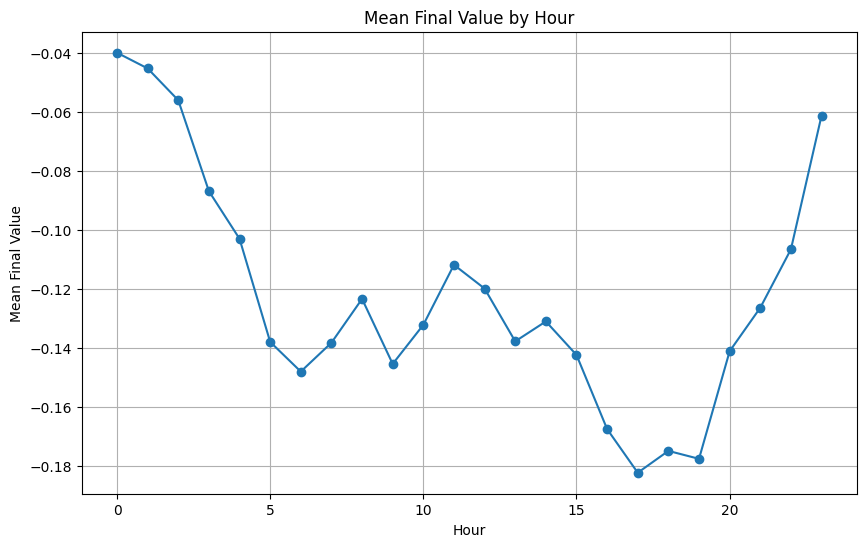

In [301]:
covariance_mean_hour_df = covariance_df.groupby(['hour'])['covariance_value_with_DK1'].mean()
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(covariance_mean_hour_df.index, covariance_mean_hour_df.values, marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Mean Final Value')
plt.title('Mean Final Value by Hour')
plt.grid(True)
plt.show()

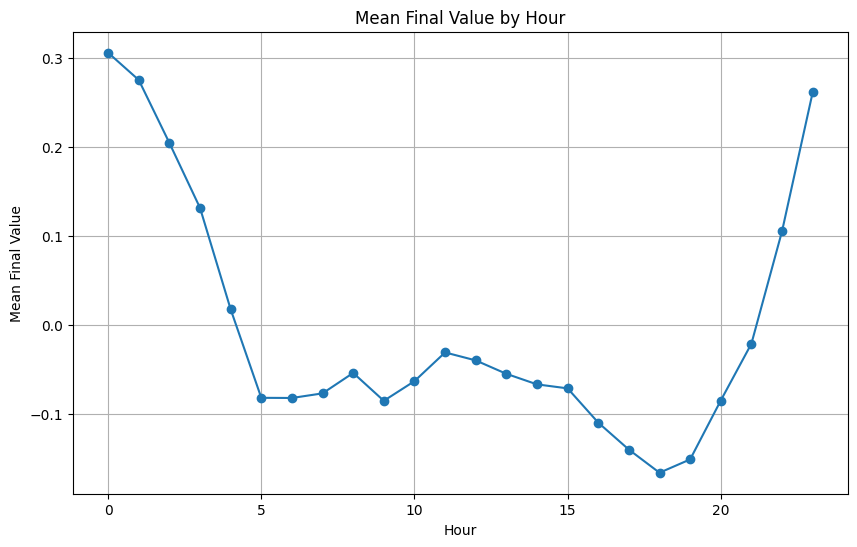

In [302]:
covariance_mean_hour_df = covariance_df.groupby(['hour'])['covariance_value_with_DK2'].mean()
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(covariance_mean_hour_df.index, covariance_mean_hour_df.values, marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Mean Final Value')
plt.title('Mean Final Value by Hour')
plt.grid(True)
plt.show()